In [1]:
import pandas as pd

In [2]:
train=pd.read_csv("train.csv")
test_df=pd.read_csv("test_x.csv")
data=train.copy()

In [3]:
data.head()

index Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0      0    Kadın     31-40        Bekar  Yüksek Lisans Mezunu   
1      1    Erkek       >60         Evli           Lise Mezunu   
2      2    Erkek     18-30        Bekar           Lise Mezunu   
3      3    Erkek     51-60         Evli           Lise Mezunu   
4      4    Erkek     31-40         Evli       Ortaokul Mezunu   

                  İstihdam Durumu  Yıllık Ortalama Gelir Yaşadığı Şehir  \
0  Düzenli ve Ücretli Bir İşi Var          748266.440879    Büyük Şehir   
1             Kendi İşinin Sahibi          246298.609605    Küçük Şehir   
2  Düzenli ve Ücretli Bir İşi Var          268582.732360    Küçük Şehir   
3             Kendi İşinin Sahibi          327721.837865         Kırsal   
4  İşsiz veya Düzenli Bir İşi Yok          397431.626948    Büyük Şehir   

      En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0  Elektronik ve Teknolojik Ürünler                        32010.900881   
1                  Spor Malzemeleri                         4145.729891   
2                             Giyim                         9924.379414   
3                             Giyim                         6417.780714   
4                             Giyim                         7886.663061   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
0                                   37.310644                   Etmiyor   
1                                   11.554851                   Etmiyor   
2                                   55.353236                    Ediyor   
3                                   15.417239                   Etmiyor   
4                                   14.689837                   Etmiyor   

  Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  
0    obek_4                                102.936904  
1    obek_5                                 82.176053  
2    obek_8                                141.661426  
3    obek_3                                 17.097397  
4    obek_3                                 20.470459

In [4]:
data["Öbek İsmi"].value_counts()

obek_4    720
obek_8    717
obek_5    706
obek_3    695
obek_7    695
obek_1    692
obek_6    688
obek_2    547
Name: Öbek İsmi, dtype: int64

In [5]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

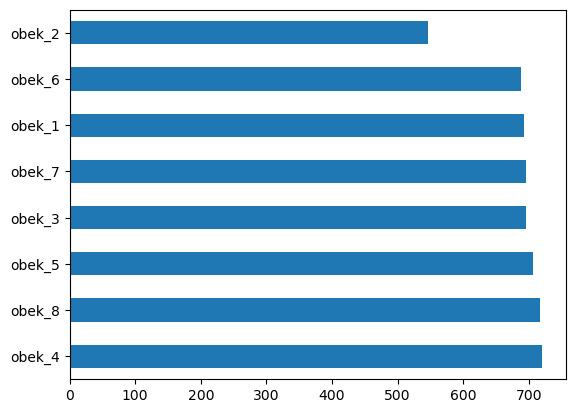

In [6]:
data["Öbek İsmi"].value_counts().plot.barh();

In [7]:
data.describe().round(3)

index  Yıllık Ortalama Gelir  Yıllık Ortalama Satın Alım Miktarı  \
count  5460.000               5460.000                            5460.000   
mean   2729.500             363571.133                           16616.612   
std    1576.311             219714.442                           14099.172   
min       0.000              43922.989                            2859.254   
25%    1364.750             215693.439                            4931.859   
50%    2729.500             286925.436                            8426.819   
75%    4094.250             468188.222                           30579.245   
max    5459.000            1192437.145                           48605.594   

       Yıllık Ortalama Sipariş Verilen Ürün Adedi  \
count                                    5460.000   
mean                                       24.041   
std                                        14.946   
min                                         0.000   
25%                                        11.551   
50%                                        20.096   
75%                                        35.918   
max                                        64.616   

       Yıllık Ortalama Sepete Atılan Ürün Adedi  
count                                  5460.000  
mean                                     73.446  
std                                      47.214  
min                                       3.978  
25%                                      25.009  
50%                                      82.486  
75%                                     104.473  
max                                     242.308

In [8]:
data.corr()

index  Yıllık Ortalama Gelir  \
index                                       1.000000               0.036008   
Yıllık Ortalama Gelir                       0.036008               1.000000   
Yıllık Ortalama Satın Alım Miktarı          0.019259               0.740238   
Yıllık Ortalama Sipariş Verilen Ürün Adedi  0.012507               0.444398   
Yıllık Ortalama Sepete Atılan Ürün Adedi   -0.001693               0.145425   

                                            Yıllık Ortalama Satın Alım Miktarı  \
index                                                                 0.019259   
Yıllık Ortalama Gelir                                                 0.740238   
Yıllık Ortalama Satın Alım Miktarı                                    1.000000   
Yıllık Ortalama Sipariş Verilen Ürün Adedi                            0.418499   
Yıllık Ortalama Sepete Atılan Ürün Adedi                              0.133864   

                                            Yıllık Ortalama Sipariş Verilen Ürün Adedi  \
index                                                                         0.012507   
Yıllık Ortalama Gelir                                                         0.444398   
Yıllık Ortalama Satın Alım Miktarı                                            0.418499   
Yıllık Ortalama Sipariş Verilen Ürün Adedi                                    1.000000   
Yıllık Ortalama Sepete Atılan Ürün Adedi                                      0.659455   

                                            Yıllık Ortalama Sepete Atılan Ürün Adedi  
index                                                                      -0.001693  
Yıllık Ortalama Gelir                                                       0.145425  
Yıllık Ortalama Satın Alım Miktarı                                          0.133864  
Yıllık Ortalama Sipariş Verilen Ürün Adedi                                  0.659455  
Yıllık Ortalama Sepete Atılan Ürün Adedi                                    1.000000

In [9]:
data.drop("index",axis=1,inplace=True)

In [10]:
data.head()

Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0    Kadın     31-40        Bekar  Yüksek Lisans Mezunu   
1    Erkek       >60         Evli           Lise Mezunu   
2    Erkek     18-30        Bekar           Lise Mezunu   
3    Erkek     51-60         Evli           Lise Mezunu   
4    Erkek     31-40         Evli       Ortaokul Mezunu   

                  İstihdam Durumu  Yıllık Ortalama Gelir Yaşadığı Şehir  \
0  Düzenli ve Ücretli Bir İşi Var          748266.440879    Büyük Şehir   
1             Kendi İşinin Sahibi          246298.609605    Küçük Şehir   
2  Düzenli ve Ücretli Bir İşi Var          268582.732360    Küçük Şehir   
3             Kendi İşinin Sahibi          327721.837865         Kırsal   
4  İşsiz veya Düzenli Bir İşi Yok          397431.626948    Büyük Şehir   

      En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0  Elektronik ve Teknolojik Ürünler                        32010.900881   
1                  Spor Malzemeleri                         4145.729891   
2                             Giyim                         9924.379414   
3                             Giyim                         6417.780714   
4                             Giyim                         7886.663061   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
0                                   37.310644                   Etmiyor   
1                                   11.554851                   Etmiyor   
2                                   55.353236                    Ediyor   
3                                   15.417239                   Etmiyor   
4                                   14.689837                   Etmiyor   

  Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  
0    obek_4                                102.936904  
1    obek_5                                 82.176053  
2    obek_8                                141.661426  
3    obek_3                                 17.097397  
4    obek_3                                 20.470459

In [11]:
df_2 = data[data["Öbek İsmi"] == "obek_2"]      


In [12]:
from sklearn.utils import resample
desired_sample_count = 150

df_2_upsampled = resample(df_2, replace=True, n_samples=desired_sample_count, random_state=12)



In [13]:
df_2_upsampled.shape

(150, 13)

In [14]:
balanced_data = pd.concat([data, df_2_upsampled])

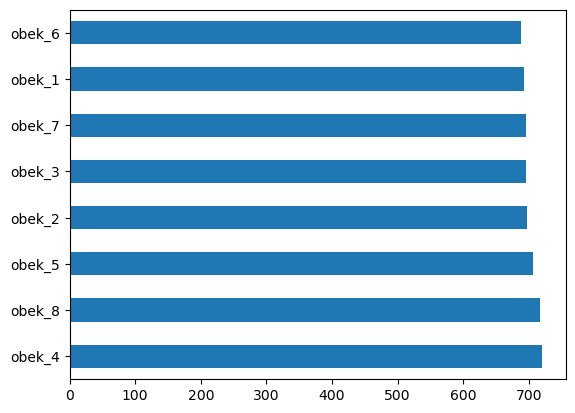

In [15]:
balanced_data["Öbek İsmi"].value_counts().plot.barh();

In [16]:
hopa=data.copy()

In [17]:
#yola devam

In [18]:
data=balanced_data

In [19]:
x=data.drop("Öbek İsmi",axis=1)
y=data["Öbek İsmi"]

In [20]:
#category çecirme

In [21]:
#dönüştürelecek DataFrame adı -->data

columns_l = list(x.columns)
categorical_columns = []

data=x

object_to_category = False  # Önce döngüde herhangi bir değişiklik yapılmadığını varsayalım

for i in columns_l:
    if data[i].dtype == 'object' or data[i].dtype.name == 'category':
        categorical_columns.append(i)
        if data[i].dtype == 'object':
            object_to_category = True  # En az bir "object" tipinde sütun bulundu

# "object" tipindeki sütunları "category" tipine dönüştürme ve çevrilenleri yazdırma
for column in categorical_columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype('category')

# Eğer dönüştürme yapıldıysa, çevrilenleri yazdırma
if object_to_category:
    print("Kategorik değişkene çevrilenler:")
    for column in categorical_columns:
        if data[column].dtype == 'category':
            print(column)
else:
    print("Object tipinde kolon yok.")
    
x=data

Kategorik değişkene çevrilenler:
Cinsiyet
Yaş Grubu
Medeni Durum
Eğitim Düzeyi
İstihdam Durumu
Yaşadığı Şehir
En Çok İlgilendiği Ürün Grubu
Eğitime Devam Etme Durumu


In [22]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5610 entries, 0 to 4006
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   Cinsiyet                                    5610 non-null   category
 1   Yaş Grubu                                   5610 non-null   category
 2   Medeni Durum                                5610 non-null   category
 3   Eğitim Düzeyi                               5610 non-null   category
 4   İstihdam Durumu                             5610 non-null   category
 5   Yıllık Ortalama Gelir                       5610 non-null   float64 
 6   Yaşadığı Şehir                              5610 non-null   category
 7   En Çok İlgilendiği Ürün Grubu               5610 non-null   category
 8   Yıllık Ortalama Satın Alım Miktarı          5610 non-null   float64 
 9   Yıllık Ortalama Sipariş Verilen Ürün Adedi  5610 non-null   float64 
 10  

In [23]:
#dumy değişken dönüşümü

In [24]:
import pandas as pd
#girdi--> data

df = x

# Kategorik sütunlara dönüşüm ve (n-1) kuralı uygulama
categorical_columns = df.select_dtypes(include=["category"]).columns

for column in categorical_columns:
    dummies = pd.get_dummies(df[column], prefix=column, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)

x=df

In [25]:
x.head()

Yıllık Ortalama Gelir  Yıllık Ortalama Satın Alım Miktarı  \
0          748266.440879                        32010.900881   
1          246298.609605                         4145.729891   
2          268582.732360                         9924.379414   
3          327721.837865                         6417.780714   
4          397431.626948                         7886.663061   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi  \
0                                   37.310644   
1                                   11.554851   
2                                   55.353236   
3                                   15.417239   
4                                   14.689837   

   Yıllık Ortalama Sepete Atılan Ürün Adedi  Cinsiyet_Kadın  Yaş Grubu_31-40  \
0                                102.936904               1                1   
1                                 82.176053               0                0   
2                                141.661426               0                0   
3                                 17.097397               0                0   
4                                 20.470459               0                1   

   Yaş Grubu_41-50  Yaş Grubu_51-60  Yaş Grubu_>60  Medeni Durum_Evli  ...  \
0                0                0              0                  0  ...   
1                0                0              1                  1  ...   
2                0                0              0                  0  ...   
3                0                1              0                  1  ...   
4                0                0              0                  1  ...   

   İstihdam Durumu_Kendi İşinin Sahibi  \
0                                    0   
1                                    1   
2                                    0   
3                                    1   
4                                    0   

   İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               1   

   Yaşadığı Şehir_Köy veya Kasaba  Yaşadığı Şehir_Küçük Şehir  \
0                               0                           0   
1                               0                           1   
2                               0                           1   
3                               0                           0   
4                               0                           0   

   Yaşadığı Şehir_Kırsal  En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya  \
0                      0                                            0   
1                      0                                            0   
2                      0                                            0   
3                      1                                            0   
4                      0                                            0   

   En Çok İlgilendiği Ürün Grubu_Giyim  \
0                                    0   
1                                    0   
2                                    1   
3                                    1   
4                                    1   

   En Çok İlgilendiği Ürün Grubu_Kozmetik  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri  \
0                                               0   
1                                               1   
2                                               0   
3                                               0   
4                                               0   

   Eğitime Devam Etme Durumu_Etmiyor  
0                                  1  
1                                  1  
2          

In [26]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5610 entries, 0 to 4006
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Yıllık Ortalama Gelir                           5610 non-null   float64
 1   Yıllık Ortalama Satın Alım Miktarı              5610 non-null   float64
 2   Yıllık Ortalama Sipariş Verilen Ürün Adedi      5610 non-null   float64
 3   Yıllık Ortalama Sepete Atılan Ürün Adedi        5610 non-null   float64
 4   Cinsiyet_Kadın                                  5610 non-null   uint8  
 5   Yaş Grubu_31-40                                 5610 non-null   uint8  
 6   Yaş Grubu_41-50                                 5610 non-null   uint8  
 7   Yaş Grubu_51-60                                 5610 non-null   uint8  
 8   Yaş Grubu_>60                                   5610 non-null   uint8  
 9   Medeni Durum_Evli                        

In [27]:
dumy_colons = []


for column in x.columns:
    if x[column].dtype == "uint8":
        dumy_colons.append(column)
    else:
        pass


In [28]:
dumy_colons

['Cinsiyet_Kadın',
 'Yaş Grubu_31-40',
 'Yaş Grubu_41-50',
 'Yaş Grubu_51-60',
 'Yaş Grubu_>60',
 'Medeni Durum_Evli',
 'Eğitim Düzeyi_Doktora Ötesi',
 'Eğitim Düzeyi_Eğitimsiz',
 'Eğitim Düzeyi_Lise Mezunu',
 'Eğitim Düzeyi_Ortaokul Mezunu',
 'Eğitim Düzeyi_Yüksek Lisans Mezunu',
 'Eğitim Düzeyi_Yüksekokul Mezunu',
 'Eğitim Düzeyi_Üniversite Mezunu',
 'Eğitim Düzeyi_İlkokul Mezunu',
 'İstihdam Durumu_Emekli',
 'İstihdam Durumu_Kendi İşinin Sahibi',
 'İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok',
 'Yaşadığı Şehir_Köy veya Kasaba',
 'Yaşadığı Şehir_Küçük Şehir',
 'Yaşadığı Şehir_Kırsal',
 'En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya',
 'En Çok İlgilendiği Ürün Grubu_Giyim',
 'En Çok İlgilendiği Ürün Grubu_Kozmetik',
 'En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri',
 'Eğitime Devam Etme Durumu_Etmiyor']

In [29]:
#standardizasyon

In [30]:
from sklearn.preprocessing import StandardScaler

# Veriyi alın
# x_train: eğitim verisi
# x_test: test verisi

x_train=x


# Seçilen dummy değişken sütunları
selected_dummy_cols = dumy_colons
# Seçilen dummy değişkenleri çıkarın ve kalan sütunlar üzerinde işlem yapın
x_train_without_dummy = x_train.drop(selected_dummy_cols, axis=1)

# StandardScaler nesnesini oluşturun
scaler = StandardScaler()

# Eğitim verisini kullanarak ölçeklendirme işlemini öğrenin ve uygulayın
x_train_scaled = scaler.fit_transform(x_train_without_dummy)




# Dummy değişken sütunları ile ölçeklendirilmiş verileri birleştirin
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train_without_dummy.columns, index=x_train_without_dummy.index)

# Dummy değişken sütunları ekleyerek ölçeklendirilmiş verileri tamamlanmış veriye dönüştürün
x_train_final = pd.concat([x_train_scaled_df, x_train[selected_dummy_cols]], axis=1)

x=x_train_final

x.head()

Yıllık Ortalama Gelir  Yıllık Ortalama Satın Alım Miktarı  \
0               1.778211                            1.118361   
1              -0.511290                           -0.864086   
2              -0.409651                           -0.452968   
3              -0.139915                           -0.702443   
4               0.178035                           -0.597940   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi  \
0                                    0.902493   
1                                   -0.840020   
2                                    2.123168   
3                                   -0.578709   
4                                   -0.627922   

   Yıllık Ortalama Sepete Atılan Ürün Adedi  Cinsiyet_Kadın  Yaş Grubu_31-40  \
0                                  0.643934               1                1   
1                                  0.200040               0                0   
2                                  1.471915               0                0   
3                                 -1.191427               0                0   
4                                 -1.119307               0                1   

   Yaş Grubu_41-50  Yaş Grubu_51-60  Yaş Grubu_>60  Medeni Durum_Evli  ...  \
0                0                0              0                  0  ...   
1                0                0              1                  1  ...   
2                0                0              0                  0  ...   
3                0                1              0                  1  ...   
4                0                0              0                  1  ...   

   İstihdam Durumu_Kendi İşinin Sahibi  \
0                                    0   
1                                    1   
2                                    0   
3                                    1   
4                                    0   

   İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               1   

   Yaşadığı Şehir_Köy veya Kasaba  Yaşadığı Şehir_Küçük Şehir  \
0                               0                           0   
1                               0                           1   
2                               0                           1   
3                               0                           0   
4                               0                           0   

   Yaşadığı Şehir_Kırsal  En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya  \
0                      0                                            0   
1                      0                                            0   
2                      0                                            0   
3                      1                                            0   
4                      0                                            0   

   En Çok İlgilendiği Ürün Grubu_Giyim  \
0                                    0   
1                                    0   
2                                    1   
3                                    1   
4                                    1   

   En Çok İlgilendiği Ürün Grubu_Kozmetik  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri  \
0                                               0   
1                                               1   
2                                               0   
3                                               0   
4                                               0   

   Eğitime Devam Etme Durumu_Etmiyor  
0                                  1  
1                                  1  
2          

In [31]:
##model denemeleri

In [32]:
#test datasını oluşturma

test_df.head()

index Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0      0    Erkek     51-60         Evli  Yüksek Lisans Mezunu   
1      1    Erkek     41-50        Bekar           Lise Mezunu   
2      2    Kadın       >60         Evli             Eğitimsiz   
3      3    Kadın     51-60         Evli         Doktora Ötesi   
4      4    Erkek     18-30         Evli  Yüksek Lisans Mezunu   

                  İstihdam Durumu  Yıllık Ortalama Gelir   Yaşadığı Şehir  \
0  Düzenli ve Ücretli Bir İşi Var          365331.930346  Köy veya Kasaba   
1  İşsiz veya Düzenli Bir İşi Yok          414899.236174      Büyük Şehir   
2  İşsiz veya Düzenli Bir İşi Yok          152825.872271      Küçük Şehir   
3  Düzenli ve Ücretli Bir İşi Var          489052.908472  Köy veya Kasaba   
4             Kendi İşinin Sahibi          323635.711534      Küçük Şehir   

  En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0                         Giyim                         5566.587664   
1              Spor Malzemeleri                         6756.766203   
2                         Giyim                         4493.915682   
3                      Kozmetik                        42670.646595   
4                         Giyim                         5959.266948   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
0                                   15.442635                   Etmiyor   
1                                   14.957246                   Etmiyor   
2                                   10.907930                   Etmiyor   
3                                   32.333021                   Etmiyor   
4                                    4.519968                   Etmiyor   

   Yıllık Ortalama Sepete Atılan Ürün Adedi  
0                                 19.646460  
1                                 19.675863  
2                                 46.904518  
3                                 48.083609  
4                                 12.752491

In [33]:
#dönüştürelecek DataFrame adı -->data

columns_l = list(test_df.columns)
categorical_columns = []

data=test_df

object_to_category = False  # Önce döngüde herhangi bir değişiklik yapılmadığını varsayalım

for i in columns_l:
    if data[i].dtype == 'object' or data[i].dtype.name == 'category':
        categorical_columns.append(i)
        if data[i].dtype == 'object':
            object_to_category = True  # En az bir "object" tipinde sütun bulundu

# "object" tipindeki sütunları "category" tipine dönüştürme ve çevrilenleri yazdırma
for column in categorical_columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype('category')

# Eğer dönüştürme yapıldıysa, çevrilenleri yazdırma
if object_to_category:
    print("Kategorik değişkene çevrilenler:")
    for column in categorical_columns:
        if data[column].dtype == 'category':
            print(column)
else:
    print("Object tipinde kolon yok.")
    
test_df=data
test_df.head()

Kategorik değişkene çevrilenler:
Cinsiyet
Yaş Grubu
Medeni Durum
Eğitim Düzeyi
İstihdam Durumu
Yaşadığı Şehir
En Çok İlgilendiği Ürün Grubu
Eğitime Devam Etme Durumu


index Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0      0    Erkek     51-60         Evli  Yüksek Lisans Mezunu   
1      1    Erkek     41-50        Bekar           Lise Mezunu   
2      2    Kadın       >60         Evli             Eğitimsiz   
3      3    Kadın     51-60         Evli         Doktora Ötesi   
4      4    Erkek     18-30         Evli  Yüksek Lisans Mezunu   

                  İstihdam Durumu  Yıllık Ortalama Gelir   Yaşadığı Şehir  \
0  Düzenli ve Ücretli Bir İşi Var          365331.930346  Köy veya Kasaba   
1  İşsiz veya Düzenli Bir İşi Yok          414899.236174      Büyük Şehir   
2  İşsiz veya Düzenli Bir İşi Yok          152825.872271      Küçük Şehir   
3  Düzenli ve Ücretli Bir İşi Var          489052.908472  Köy veya Kasaba   
4             Kendi İşinin Sahibi          323635.711534      Küçük Şehir   

  En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0                         Giyim                         5566.587664   
1              Spor Malzemeleri                         6756.766203   
2                         Giyim                         4493.915682   
3                      Kozmetik                        42670.646595   
4                         Giyim                         5959.266948   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
0                                   15.442635                   Etmiyor   
1                                   14.957246                   Etmiyor   
2                                   10.907930                   Etmiyor   
3                                   32.333021                   Etmiyor   
4                                    4.519968                   Etmiyor   

   Yıllık Ortalama Sepete Atılan Ürün Adedi  
0                                 19.646460  
1                                 19.675863  
2                                 46.904518  
3                                 48.083609  
4                                 12.752491

In [34]:
import pandas as pd
#girdi--> data

df = test_df

# Kategorik sütunlara dönüşüm ve (n-1) kuralı uygulama
categorical_columns = df.select_dtypes(include=["category"]).columns

for column in categorical_columns:
    dummies = pd.get_dummies(df[column], prefix=column, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)

test_df=df

In [35]:
test_df.head()

index  Yıllık Ortalama Gelir  Yıllık Ortalama Satın Alım Miktarı  \
0      0          365331.930346                         5566.587664   
1      1          414899.236174                         6756.766203   
2      2          152825.872271                         4493.915682   
3      3          489052.908472                        42670.646595   
4      4          323635.711534                         5959.266948   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi  \
0                                   15.442635   
1                                   14.957246   
2                                   10.907930   
3                                   32.333021   
4                                    4.519968   

   Yıllık Ortalama Sepete Atılan Ürün Adedi  Cinsiyet_Kadın  Yaş Grubu_31-40  \
0                                 19.646460               0                0   
1                                 19.675863               0                0   
2                                 46.904518               1                0   
3                                 48.083609               1                0   
4                                 12.752491               0                0   

   Yaş Grubu_41-50  Yaş Grubu_51-60  Yaş Grubu_>60  ...  \
0                0                1              0  ...   
1                1                0              0  ...   
2                0                0              1  ...   
3                0                1              0  ...   
4                0                0              0  ...   

   İstihdam Durumu_Kendi İşinin Sahibi  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    1   

   İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok  \
0                                               0   
1                                               1   
2                                               1   
3                                               0   
4                                               0   

   Yaşadığı Şehir_Köy veya Kasaba  Yaşadığı Şehir_Küçük Şehir  \
0                               1                           0   
1                               0                           0   
2                               0                           1   
3                               1                           0   
4                               0                           1   

   Yaşadığı Şehir_Kırsal  En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya  \
0                      0                                            0   
1                      0                                            0   
2                      0                                            0   
3                      0                                            0   
4                      0                                            0   

   En Çok İlgilendiği Ürün Grubu_Giyim  \
0                                    1   
1                                    0   
2                                    1   
3                                    0   
4                                    1   

   En Çok İlgilendiği Ürün Grubu_Kozmetik  \
0                                       0   
1                                       0   
2                                       0   
3                                       1   
4                                       0   

   En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri  \
0                                               0   
1                                               1   
2                                               0   
3                                               0   
4                                               0   

   Eğitime Devam Etme Durumu_Etmiyor  
0                                  1  
1                                  1  
2                                  1  
3                                  1  
4    

In [36]:
dumy_colons = []


for column in test_df.columns:
    if test_df[column].dtype == "uint8":
        dumy_colons.append(column)
    else:
        pass
dumy_colons

['Cinsiyet_Kadın',
 'Yaş Grubu_31-40',
 'Yaş Grubu_41-50',
 'Yaş Grubu_51-60',
 'Yaş Grubu_>60',
 'Medeni Durum_Evli',
 'Eğitim Düzeyi_Doktora Ötesi',
 'Eğitim Düzeyi_Eğitimsiz',
 'Eğitim Düzeyi_Lise Mezunu',
 'Eğitim Düzeyi_Ortaokul Mezunu',
 'Eğitim Düzeyi_Yüksek Lisans Mezunu',
 'Eğitim Düzeyi_Yüksekokul Mezunu',
 'Eğitim Düzeyi_Üniversite Mezunu',
 'Eğitim Düzeyi_İlkokul Mezunu',
 'İstihdam Durumu_Emekli',
 'İstihdam Durumu_Kendi İşinin Sahibi',
 'İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok',
 'Yaşadığı Şehir_Köy veya Kasaba',
 'Yaşadığı Şehir_Küçük Şehir',
 'Yaşadığı Şehir_Kırsal',
 'En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya',
 'En Çok İlgilendiği Ürün Grubu_Giyim',
 'En Çok İlgilendiği Ürün Grubu_Kozmetik',
 'En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri',
 'Eğitime Devam Etme Durumu_Etmiyor']

In [37]:
from sklearn.preprocessing import StandardScaler

# Veriyi alın
# x_train: eğitim verisi
# x_test: test verisi

x_train=test_df


# Seçilen dummy değişken sütunları
selected_dummy_cols = dumy_colons
# Seçilen dummy değişkenleri çıkarın ve kalan sütunlar üzerinde işlem yapın
x_train_without_dummy = x_train.drop(selected_dummy_cols, axis=1)

# StandardScaler nesnesini oluşturun
scaler = StandardScaler()

# Eğitim verisini kullanarak ölçeklendirme işlemini öğrenin ve uygulayın
x_train_scaled = scaler.fit_transform(x_train_without_dummy)




# Dummy değişken sütunları ile ölçeklendirilmiş verileri birleştirin
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train_without_dummy.columns, index=x_train_without_dummy.index)

# Dummy değişken sütunları ekleyerek ölçeklendirilmiş verileri tamamlanmış veriye dönüştürün
x_train_final = pd.concat([x_train_scaled_df, x_train[selected_dummy_cols]], axis=1)

test_df=x_train_final

test_df.head()

index  Yıllık Ortalama Gelir  Yıllık Ortalama Satın Alım Miktarı  \
0 -1.731311               0.013800                           -0.778776   
1 -1.729830               0.235917                           -0.695331   
2 -1.728350              -0.938465                           -0.853982   
3 -1.726870               0.568208                            1.822635   
4 -1.725389              -0.173046                           -0.751244   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi  \
0                                   -0.551195   
1                                   -0.584541   
2                                   -0.862732   
3                                    0.609184   
4                                   -1.301588   

   Yıllık Ortalama Sepete Atılan Ürün Adedi  Cinsiyet_Kadın  Yaş Grubu_31-40  \
0                                 -1.132406               0                0   
1                                 -1.131771               0                0   
2                                 -0.543702               1                0   
3                                 -0.518237               1                0   
4                                 -1.281298               0                0   

   Yaş Grubu_41-50  Yaş Grubu_51-60  Yaş Grubu_>60  ...  \
0                0                1              0  ...   
1                1                0              0  ...   
2                0                0              1  ...   
3                0                1              0  ...   
4                0                0              0  ...   

   İstihdam Durumu_Kendi İşinin Sahibi  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    1   

   İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok  \
0                                               0   
1                                               1   
2                                               1   
3                                               0   
4                                               0   

   Yaşadığı Şehir_Köy veya Kasaba  Yaşadığı Şehir_Küçük Şehir  \
0                               1                           0   
1                               0                           0   
2                               0                           1   
3                               1                           0   
4                               0                           1   

   Yaşadığı Şehir_Kırsal  En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya  \
0                      0                                            0   
1                      0                                            0   
2                      0                                            0   
3                      0                                            0   
4                      0                                            0   

   En Çok İlgilendiği Ürün Grubu_Giyim  \
0                                    1   
1                                    0   
2                                    1   
3                                    0   
4                                    1   

   En Çok İlgilendiği Ürün Grubu_Kozmetik  \
0                                       0   
1                                       0   
2                                       0   
3                                       1   
4                                       0   

   En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri  \
0                                               0   
1                                               1   
2                                               0   
3                                               0   
4                                               0   

   Eğitime Devam Etme Durumu_Etmiyor  
0                                  1  
1                                  1  
2                                  1  
3                            

In [38]:
test_df.head()

index  Yıllık Ortalama Gelir  Yıllık Ortalama Satın Alım Miktarı  \
0 -1.731311               0.013800                           -0.778776   
1 -1.729830               0.235917                           -0.695331   
2 -1.728350              -0.938465                           -0.853982   
3 -1.726870               0.568208                            1.822635   
4 -1.725389              -0.173046                           -0.751244   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi  \
0                                   -0.551195   
1                                   -0.584541   
2                                   -0.862732   
3                                    0.609184   
4                                   -1.301588   

   Yıllık Ortalama Sepete Atılan Ürün Adedi  Cinsiyet_Kadın  Yaş Grubu_31-40  \
0                                 -1.132406               0                0   
1                                 -1.131771               0                0   
2                                 -0.543702               1                0   
3                                 -0.518237               1                0   
4                                 -1.281298               0                0   

   Yaş Grubu_41-50  Yaş Grubu_51-60  Yaş Grubu_>60  ...  \
0                0                1              0  ...   
1                1                0              0  ...   
2                0                0              1  ...   
3                0                1              0  ...   
4                0                0              0  ...   

   İstihdam Durumu_Kendi İşinin Sahibi  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    1   

   İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok  \
0                                               0   
1                                               1   
2                                               1   
3                                               0   
4                                               0   

   Yaşadığı Şehir_Köy veya Kasaba  Yaşadığı Şehir_Küçük Şehir  \
0                               1                           0   
1                               0                           0   
2                               0                           1   
3                               1                           0   
4                               0                           1   

   Yaşadığı Şehir_Kırsal  En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya  \
0                      0                                            0   
1                      0                                            0   
2                      0                                            0   
3                      0                                            0   
4                      0                                            0   

   En Çok İlgilendiği Ürün Grubu_Giyim  \
0                                    1   
1                                    0   
2                                    1   
3                                    0   
4                                    1   

   En Çok İlgilendiği Ürün Grubu_Kozmetik  \
0                                       0   
1                                       0   
2                                       0   
3                                       1   
4                                       0   

   En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri  \
0                                               0   
1                                               1   
2                                               0   
3                                               0   
4                                               0   

   Eğitime Devam Etme Durumu_Etmiyor  
0                                  1  
1                                  1  
2                                  1  
3                            

In [39]:
#lojistik

In [40]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(x,y)
loj_model

LogisticRegression(solver='liblinear')

In [41]:
loj_model.intercept_

array([-4.33104012, -8.24663245, -4.30018385, -2.56035751, -4.53035889,
       -4.56325733, -2.90329848, -1.9549433 ])

In [42]:
loj_model.coef_

array([[ 2.30869879e-01,  1.27877790e+00, -4.36293757e+00,
        -2.38632347e+00,  4.85872636e-01, -5.71386462e-01,
        -2.23118462e-01, -5.53151503e-01, -9.35267227e-01,
        -7.62680152e-01,  2.68422143e-01, -2.04162113e-01,
        -8.49734485e-01, -4.26517927e-02, -1.01359342e-01,
        -6.03342310e-01, -5.65936381e-01, -1.71288721e-01,
        -1.06257163e+00, -2.03224113e-01, -9.19404886e-02,
        -1.50363734e-01, -2.72290594e-01,  1.57231532e-01,
        -3.04673084e-01,  1.04094015e+00,  1.52759291e+00,
        -7.17043131e-01, -1.05622083e+00],
       [-3.36337166e+00, -3.89562977e-01,  1.52579502e+00,
        -5.44291044e-01,  2.60146070e+00,  4.42149102e-01,
         8.22576538e-01,  9.73047542e-01,  1.23560062e+00,
         7.22452892e-01, -3.75926918e-01, -4.20099672e-01,
        -1.10956548e+00, -3.09782560e-01, -8.20874137e-01,
        -1.76728936e+00, -1.27088868e+00, -2.47420535e-01,
         2.45860636e-01, -5.09252042e-02,  1.55006763e+00,
         5.72

In [43]:
y_pred = loj_model.predict(x)

In [44]:
confusion_matrix(y, y_pred)

array([[640,   8,  20,   8,   4,   3,   6,   3],
       [  8, 657,   4,   3,   4,   7,   8,   6],
       [ 15,   9, 652,   1,   2,   8,   6,   2],
       [  6,   2,  10, 673,   8,   6,   6,   9],
       [  5,   2,   3,   3, 680,   5,   2,   6],
       [  4,   4,   3,   4,   2, 662,   5,   4],
       [  4,   4,  10,   6,   2,   6, 659,   4],
       [  3,   6,   4,   6,   6,   1,   3, 688]], dtype=int64)

In [45]:
accuracy_score(y, y_pred)

0.9467023172905525

In [46]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      obek_1       0.93      0.92      0.93       692
      obek_2       0.95      0.94      0.95       697
      obek_3       0.92      0.94      0.93       695
      obek_4       0.96      0.93      0.95       720
      obek_5       0.96      0.96      0.96       706
      obek_6       0.95      0.96      0.96       688
      obek_7       0.95      0.95      0.95       695
      obek_8       0.95      0.96      0.96       717

    accuracy                           0.95      5610
   macro avg       0.95      0.95      0.95      5610
weighted avg       0.95      0.95      0.95      5610



In [47]:
y_pred_test = loj_model.predict(x)

In [48]:
y_pred_test

array(['obek_4', 'obek_5', 'obek_8', ..., 'obek_2', 'obek_2', 'obek_2'],
      dtype=object)

In [49]:
#catboost

In [50]:
from catboost import CatBoostClassifier

In [51]:
cat_model = CatBoostClassifier().fit(x,y)

Learning rate set to 0.086401
0:	learn: 1.6031912	total: 157ms	remaining: 2m 37s
1:	learn: 1.3458013	total: 166ms	remaining: 1m 22s
2:	learn: 1.1622621	total: 175ms	remaining: 58.1s
3:	learn: 1.0260264	total: 183ms	remaining: 45.5s
4:	learn: 0.9187742	total: 191ms	remaining: 38s
5:	learn: 0.8316918	total: 199ms	remaining: 32.9s
6:	learn: 0.7582226	total: 207ms	remaining: 29.4s
7:	learn: 0.6987659	total: 217ms	remaining: 26.9s
8:	learn: 0.6480371	total: 228ms	remaining: 25.1s
9:	learn: 0.6030317	total: 236ms	remaining: 23.4s
10:	learn: 0.5640263	total: 244ms	remaining: 22s
11:	learn: 0.5308666	total: 253ms	remaining: 20.8s
12:	learn: 0.5011015	total: 261ms	remaining: 19.8s
13:	learn: 0.4748560	total: 269ms	remaining: 18.9s
14:	learn: 0.4520860	total: 276ms	remaining: 18.2s
15:	learn: 0.4312870	total: 285ms	remaining: 17.5s
16:	learn: 0.4134271	total: 296ms	remaining: 17.1s
17:	learn: 0.3975636	total: 308ms	remaining: 16.8s
18:	learn: 0.3829280	total: 318ms	remaining: 16.4s
19:	learn: 0.

162:	learn: 0.2103762	total: 1.62s	remaining: 8.33s
163:	learn: 0.2100656	total: 1.63s	remaining: 8.33s
164:	learn: 0.2097599	total: 1.65s	remaining: 8.33s
165:	learn: 0.2096309	total: 1.65s	remaining: 8.31s
166:	learn: 0.2094484	total: 1.66s	remaining: 8.29s
167:	learn: 0.2091489	total: 1.67s	remaining: 8.29s
168:	learn: 0.2087428	total: 1.68s	remaining: 8.28s
169:	learn: 0.2084836	total: 1.69s	remaining: 8.26s
170:	learn: 0.2083009	total: 1.7s	remaining: 8.24s
171:	learn: 0.2080247	total: 1.71s	remaining: 8.22s
172:	learn: 0.2076220	total: 1.72s	remaining: 8.2s
173:	learn: 0.2073729	total: 1.73s	remaining: 8.19s
174:	learn: 0.2071453	total: 1.74s	remaining: 8.19s
175:	learn: 0.2069376	total: 1.75s	remaining: 8.21s
176:	learn: 0.2066870	total: 1.76s	remaining: 8.21s
177:	learn: 0.2063880	total: 1.78s	remaining: 8.2s
178:	learn: 0.2061722	total: 1.79s	remaining: 8.21s
179:	learn: 0.2059313	total: 1.81s	remaining: 8.24s
180:	learn: 0.2056914	total: 1.82s	remaining: 8.24s
181:	learn: 0.2

332:	learn: 0.1666089	total: 3.51s	remaining: 7.03s
333:	learn: 0.1662987	total: 3.52s	remaining: 7.03s
334:	learn: 0.1660549	total: 3.54s	remaining: 7.02s
335:	learn: 0.1657889	total: 3.55s	remaining: 7.02s
336:	learn: 0.1656162	total: 3.56s	remaining: 7.01s
337:	learn: 0.1652291	total: 3.58s	remaining: 7s
338:	learn: 0.1650372	total: 3.59s	remaining: 7s
339:	learn: 0.1648599	total: 3.6s	remaining: 7s
340:	learn: 0.1645958	total: 3.62s	remaining: 6.99s
341:	learn: 0.1642845	total: 3.63s	remaining: 6.98s
342:	learn: 0.1641089	total: 3.64s	remaining: 6.97s
343:	learn: 0.1638508	total: 3.65s	remaining: 6.96s
344:	learn: 0.1636719	total: 3.67s	remaining: 6.96s
345:	learn: 0.1633620	total: 3.68s	remaining: 6.95s
346:	learn: 0.1632038	total: 3.69s	remaining: 6.94s
347:	learn: 0.1630159	total: 3.7s	remaining: 6.93s
348:	learn: 0.1629108	total: 3.71s	remaining: 6.93s
349:	learn: 0.1625943	total: 3.73s	remaining: 6.93s
350:	learn: 0.1621913	total: 3.75s	remaining: 6.93s
351:	learn: 0.1620189	t

508:	learn: 0.1319089	total: 5.37s	remaining: 5.18s
509:	learn: 0.1317150	total: 5.38s	remaining: 5.17s
510:	learn: 0.1316104	total: 5.39s	remaining: 5.16s
511:	learn: 0.1314923	total: 5.4s	remaining: 5.15s
512:	learn: 0.1312280	total: 5.41s	remaining: 5.13s
513:	learn: 0.1310945	total: 5.42s	remaining: 5.12s
514:	learn: 0.1309276	total: 5.42s	remaining: 5.11s
515:	learn: 0.1306018	total: 5.43s	remaining: 5.09s
516:	learn: 0.1304668	total: 5.44s	remaining: 5.08s
517:	learn: 0.1303614	total: 5.45s	remaining: 5.07s
518:	learn: 0.1302116	total: 5.46s	remaining: 5.06s
519:	learn: 0.1300666	total: 5.46s	remaining: 5.04s
520:	learn: 0.1298685	total: 5.47s	remaining: 5.03s
521:	learn: 0.1297125	total: 5.48s	remaining: 5.02s
522:	learn: 0.1295928	total: 5.49s	remaining: 5s
523:	learn: 0.1294580	total: 5.49s	remaining: 4.99s
524:	learn: 0.1292331	total: 5.5s	remaining: 4.98s
525:	learn: 0.1290821	total: 5.51s	remaining: 4.96s
526:	learn: 0.1289737	total: 5.51s	remaining: 4.95s
527:	learn: 0.128

669:	learn: 0.1090362	total: 6.85s	remaining: 3.37s
670:	learn: 0.1088990	total: 6.86s	remaining: 3.36s
671:	learn: 0.1087629	total: 6.87s	remaining: 3.35s
672:	learn: 0.1086502	total: 6.87s	remaining: 3.34s
673:	learn: 0.1085031	total: 6.88s	remaining: 3.33s
674:	learn: 0.1083342	total: 6.89s	remaining: 3.32s
675:	learn: 0.1082229	total: 6.9s	remaining: 3.31s
676:	learn: 0.1080486	total: 6.91s	remaining: 3.29s
677:	learn: 0.1079476	total: 6.91s	remaining: 3.28s
678:	learn: 0.1078179	total: 6.92s	remaining: 3.27s
679:	learn: 0.1076021	total: 6.93s	remaining: 3.26s
680:	learn: 0.1075211	total: 6.94s	remaining: 3.25s
681:	learn: 0.1074388	total: 6.95s	remaining: 3.24s
682:	learn: 0.1073553	total: 6.95s	remaining: 3.23s
683:	learn: 0.1072298	total: 6.96s	remaining: 3.22s
684:	learn: 0.1070441	total: 6.97s	remaining: 3.2s
685:	learn: 0.1069414	total: 6.98s	remaining: 3.19s
686:	learn: 0.1067651	total: 6.98s	remaining: 3.18s
687:	learn: 0.1065996	total: 6.99s	remaining: 3.17s
688:	learn: 0.

834:	learn: 0.0891818	total: 8.97s	remaining: 1.77s
835:	learn: 0.0891018	total: 8.98s	remaining: 1.76s
836:	learn: 0.0890073	total: 8.99s	remaining: 1.75s
837:	learn: 0.0888907	total: 9s	remaining: 1.74s
838:	learn: 0.0887945	total: 9.01s	remaining: 1.73s
839:	learn: 0.0887053	total: 9.02s	remaining: 1.72s
840:	learn: 0.0886401	total: 9.04s	remaining: 1.71s
841:	learn: 0.0885613	total: 9.05s	remaining: 1.7s
842:	learn: 0.0884250	total: 9.07s	remaining: 1.69s
843:	learn: 0.0883107	total: 9.09s	remaining: 1.68s
844:	learn: 0.0882498	total: 9.1s	remaining: 1.67s
845:	learn: 0.0881864	total: 9.12s	remaining: 1.66s
846:	learn: 0.0881132	total: 9.13s	remaining: 1.65s
847:	learn: 0.0880089	total: 9.15s	remaining: 1.64s
848:	learn: 0.0878951	total: 9.17s	remaining: 1.63s
849:	learn: 0.0876946	total: 9.19s	remaining: 1.62s
850:	learn: 0.0876063	total: 9.2s	remaining: 1.61s
851:	learn: 0.0874660	total: 9.22s	remaining: 1.6s
852:	learn: 0.0873773	total: 9.24s	remaining: 1.59s
853:	learn: 0.08728

In [52]:
y_pred_catboost = cat_model.predict(x)

In [53]:
accuracy_score(y, y_pred_catboost)

0.9725490196078431

In [54]:
test_pred_cat=cat_model.predict(test_df)

In [55]:
test_pred_cat

array([['obek_3'],
       ['obek_3'],
       ['obek_2'],
       ...,
       ['obek_7'],
       ['obek_5'],
       ['obek_6']], dtype=object)

In [56]:
test_pred_cat.shape

(2340, 1)

In [57]:
test_pred_cat.head(5)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
sunum.head()

In [ ]:
test_df_index=pd.DataFrame(test_df.index)

In [ ]:
test_df_index.shape

In [ ]:
test_df_index.head()

In [ ]:
test_df.index

In [ ]:
veri = {
    'id': range(2340),
    'Öbek İsmi': test_pred_cat
}

In [ ]:
veri

In [ ]:
Tahmin_Dataframe = pd.DataFrame(veri)
Tahmin_Dataframe.set_index('id', inplace=True)
Tahmin_Dataframe